# Evaluation

## Results

#### Auto-Mode
Nutzt eine Heuristic, eine SInE Strategy und eine Selection Function
#### Satauto-Mode
Nutzt eine Heuristic und eine Selection Function
#### Filter-after-Union
Wendet einen SInE Filter mit b=5 und k=3 nach dem Union Select mit dem Goal als Seed auf die von Union Select gewählte Menge an

### Importe

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

### Ergebnisse

In [2]:
def summary_grafic(path: str):
    with open(path, 'r') as file:
        data = json.load(file)
        
    # Result categories
    categories = ["ProverResult.TIME_OUT", "ProverResult.PROOF_FOUND", "ProverResult.GAVE_UP"]

    # Extract data for plotting
    files = list(data.keys())
    n_files = len(files)
    n_categories = len(categories)

    # Initialize an array for category counts
    category_counts = np.zeros((n_files, n_categories), dtype=int)

    # Fill the category counts
    for i, (file, results) in enumerate(data.items()):
        for j, category in enumerate(categories):
            # Get the count for each category, defaulting to 0 if not present
            category_counts[i, j] = results.get(category, 0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.25
    index = np.arange(n_files)

    # Plot a bar for each category
    bars = []
    for j, category in enumerate(categories):
        bars.append(ax.bar(index + j * bar_width, category_counts[:, j], bar_width, label=category))

    # Add labels, legend, and title
    ax.set_xlabel('Files')
    ax.set_ylabel('Counts')
    ax.set_title('Prover Results by File')
    ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
    ax.set_xticklabels(files, rotation=45, ha='right', fontsize=9)
    ax.legend()

    # Add count labels above the bars
    for bar_group in bars:
        for bar in bar_group:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

    # Adjust layout to ensure labels fit
    plt.tight_layout()

    # Display the plot
    plt.show()

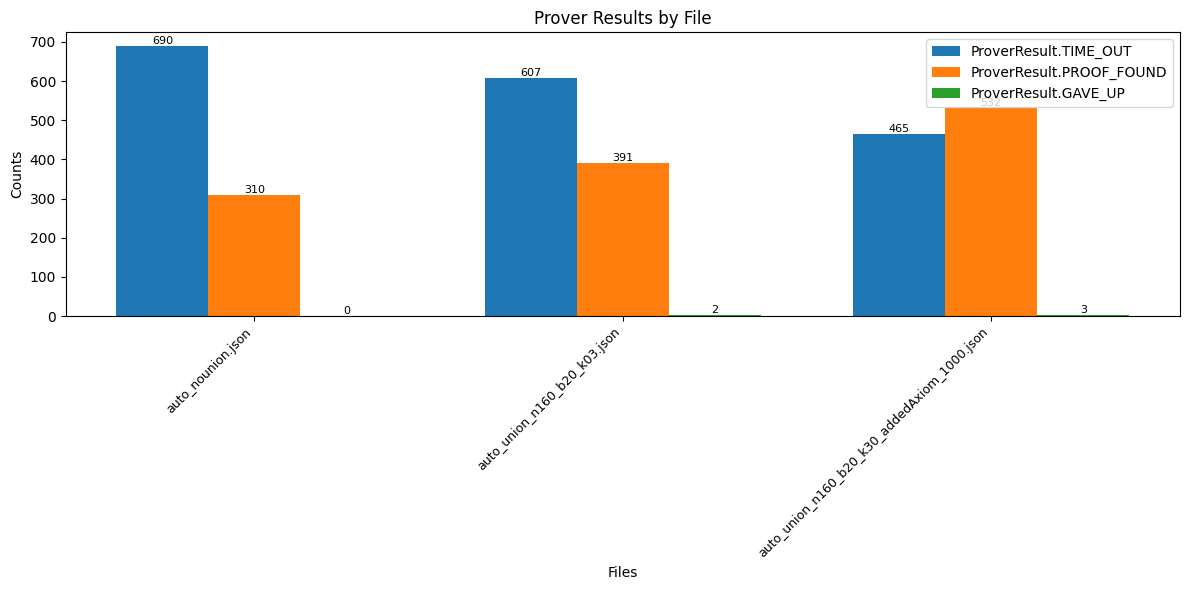

In [6]:
summary_grafic('./auto/summary.json')

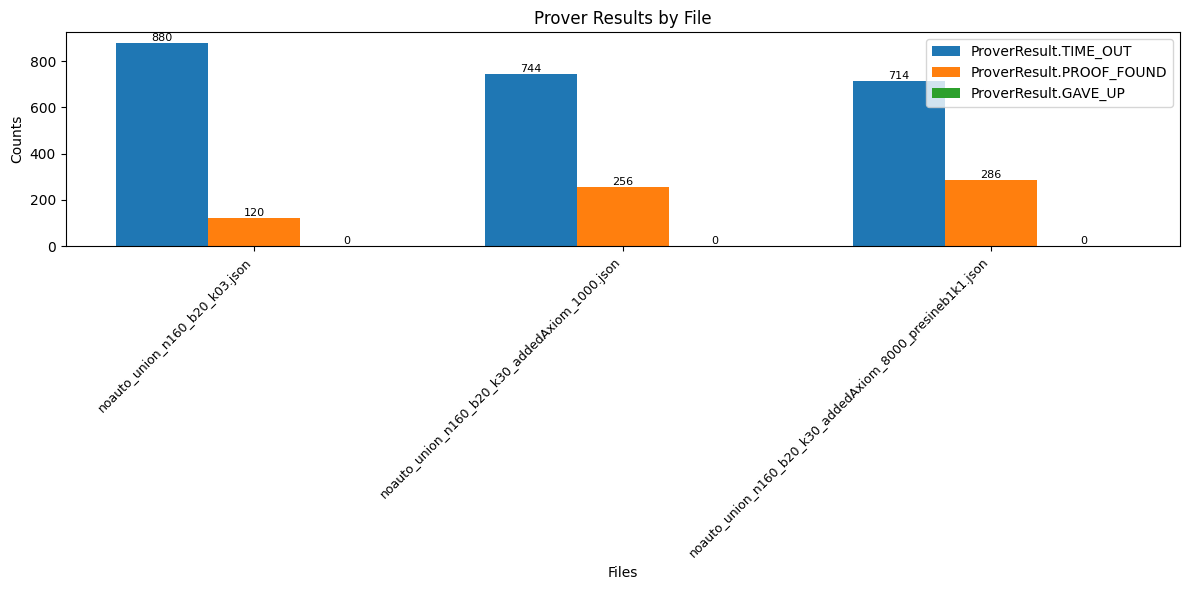

In [7]:
summary_grafic('./noauto/summary.json')

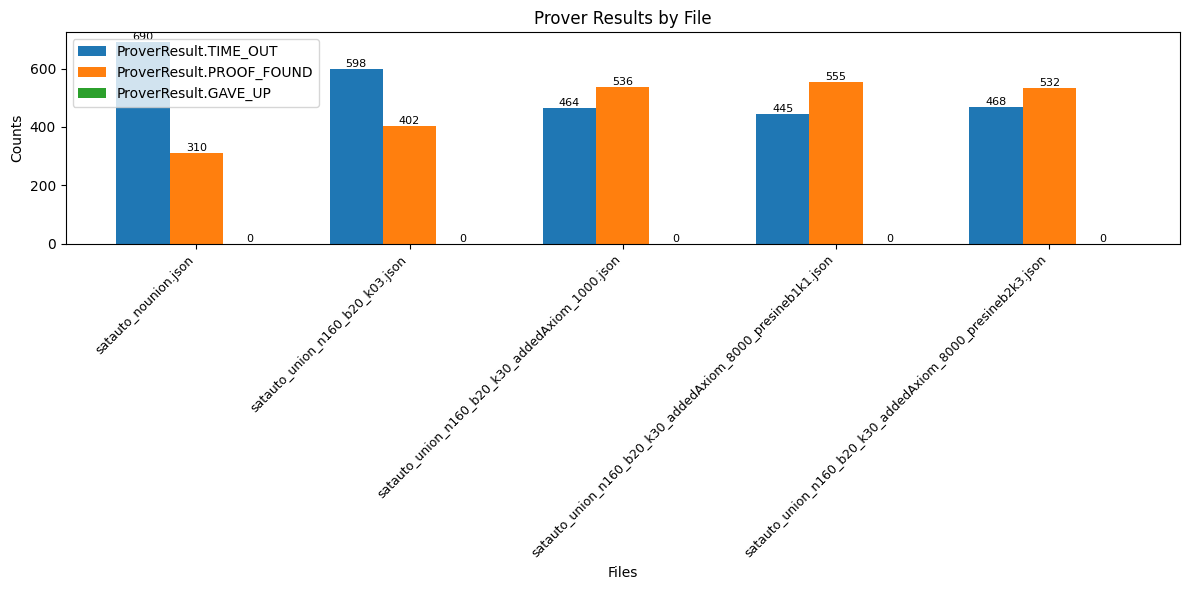

In [8]:
summary_grafic('./satauto/summary.json')

### Anzahl der Variablen wenn Proof Found und gesamt

In [9]:
def counts(file_path: str):
    with open(file_path) as f:
        data = json.load(f)

    # Prepare a list to store the means for each JSON file
    means = []

    # Iterate over each JSON dataset
    for file_name, counts in data.items():
        # Calculate the mean of variable counts
        variable_counts = list(counts.values())
        mean_variable_count = sum(variable_counts) / len(variable_counts)
        means.append((file_name, mean_variable_count))

    # Convert to a DataFrame for plotting
    df_means = pd.DataFrame(means, columns=['File', 'MeanVariableCount'])

    # Plot the data
    plt.figure(figsize=(12, 6))
    bars = plt.barh(df_means['File'], df_means['MeanVariableCount'], color='skyblue')
    plt.xlabel('Mean Variable Count')
    plt.title('Mean Variable Count per JSON File')
    plt.tight_layout()

    # Add text annotations (mean values) above the bars
    for bar in bars:
        plt.text(
            bar.get_width(),         # x-coordinate, right at the end of each bar
            bar.get_y() + bar.get_height() / 2,  # y-coordinate centered on the bar
            f'{bar.get_width():.2f}',   # annotation text (formatted mean value)
            va='center',              # vertical alignment
            ha='left',                # horizontal alignment
            color='black',            # text color
            fontsize=10              # font size
        )

    plt.show()

# Example usage
# variable_counts('evaluation/variable_counts_grouped.json')

##### Proof Found

In [10]:
counts("variable_counts_grouped_proof_found.json")

FileNotFoundError: [Errno 2] No such file or directory: 'variable_counts_grouped_proof_found.json'

##### All

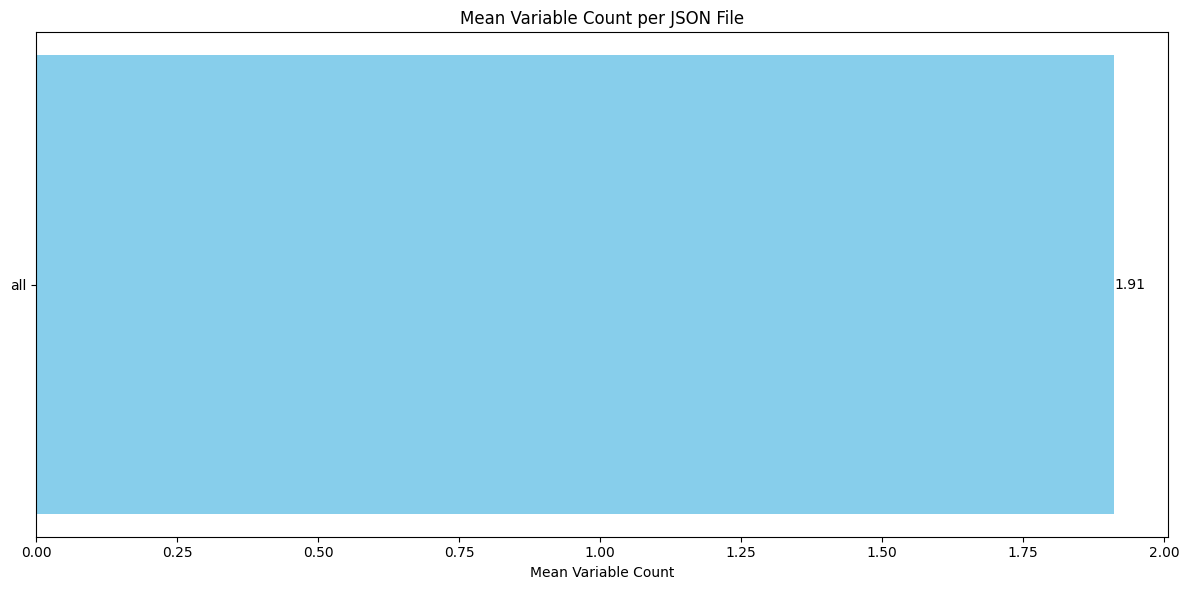

In [7]:
counts("variable_counts_grouped_all.json")

#### Count signs |, &, ?, !, ~

##### Proof Found

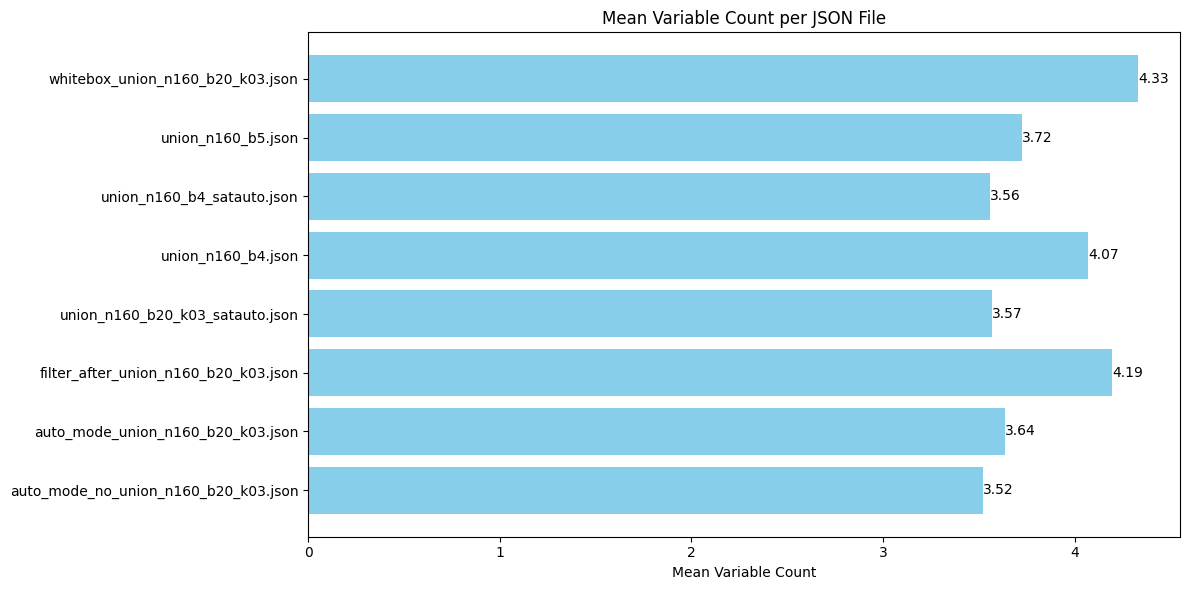

In [8]:
counts("signs_counts_grouped_proof_found.json")

##### All

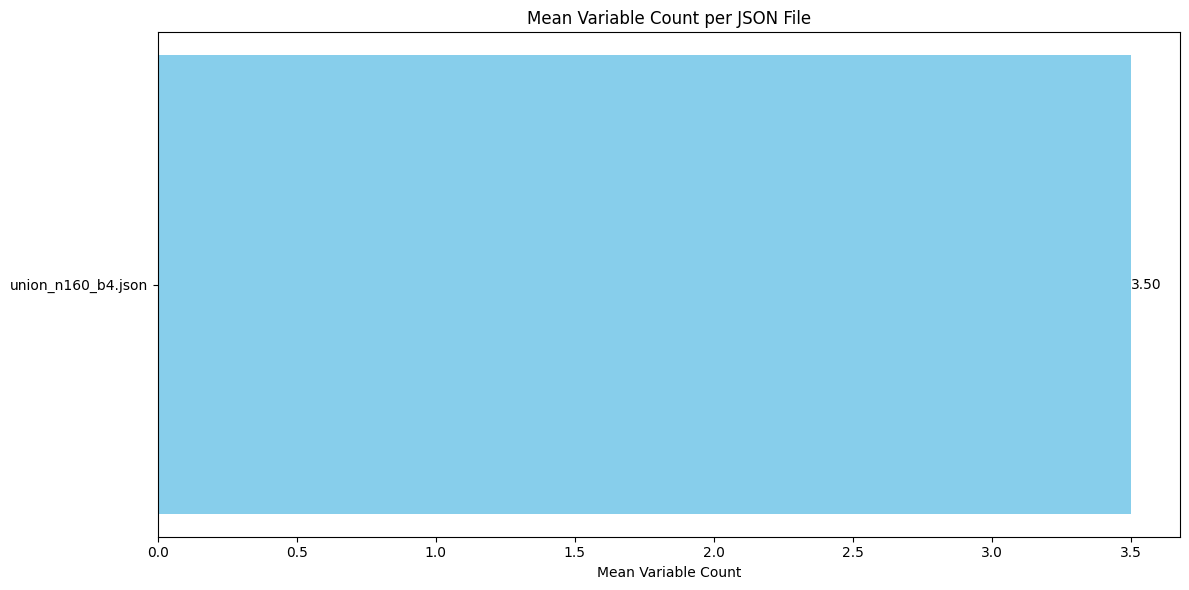

In [9]:
counts("signs_counts_grouped_all.json")

#### Character Count

##### Proof Found

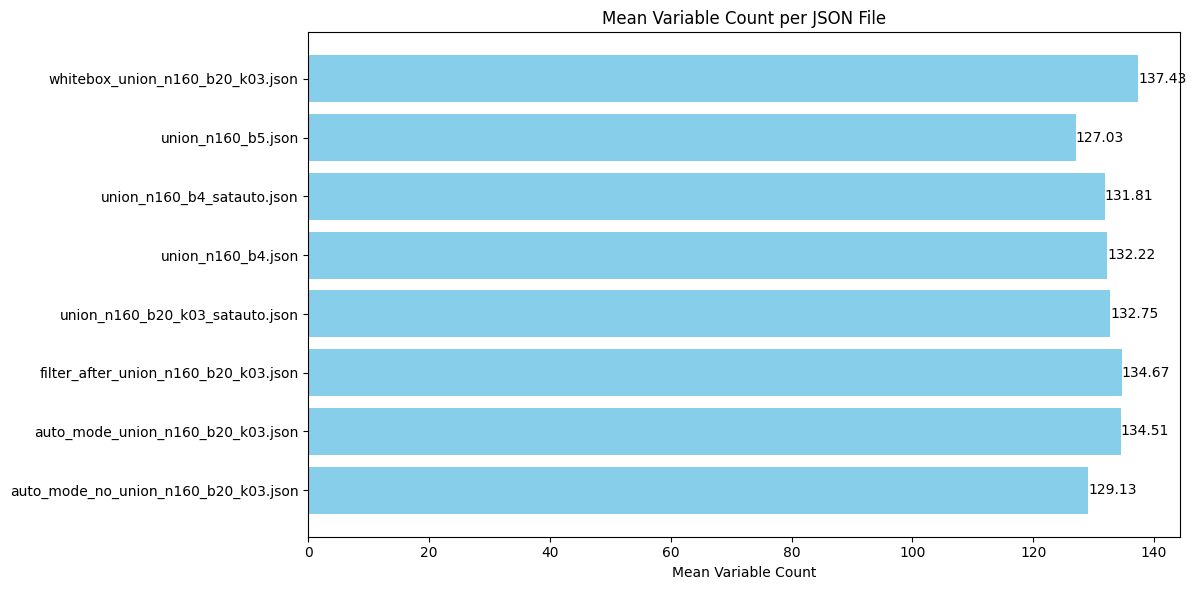

In [10]:
counts("character_counts_grouped_proof_found.json")

##### All

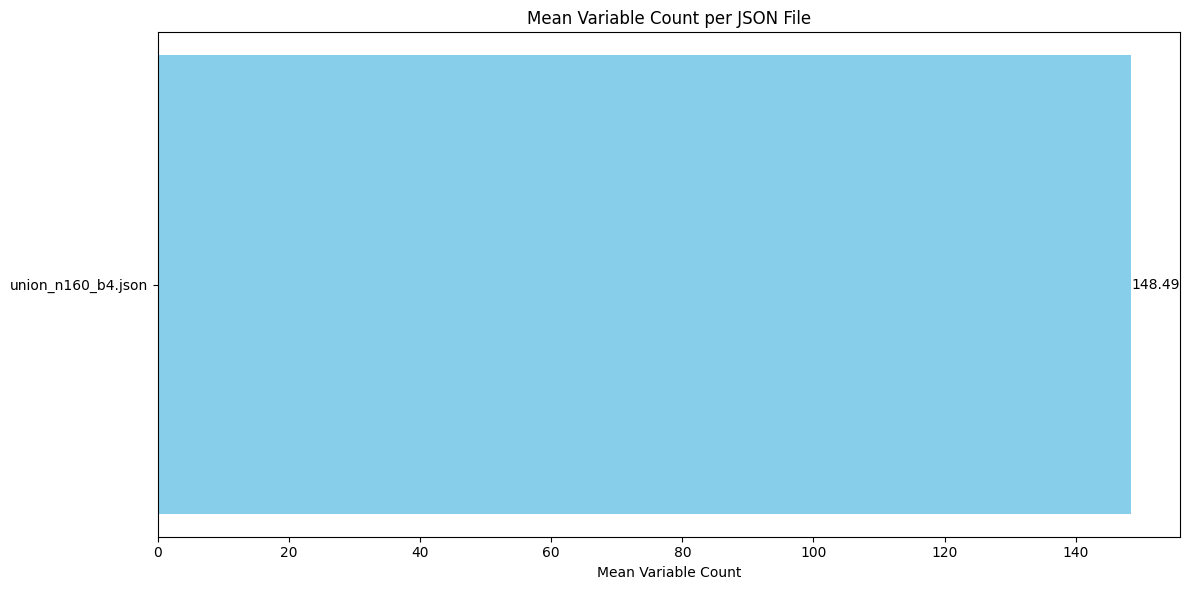

In [11]:
counts("character_counts_grouped_all.json")

#### How often do the used variables appear as variables in adimen.sumo

##### Proof Found

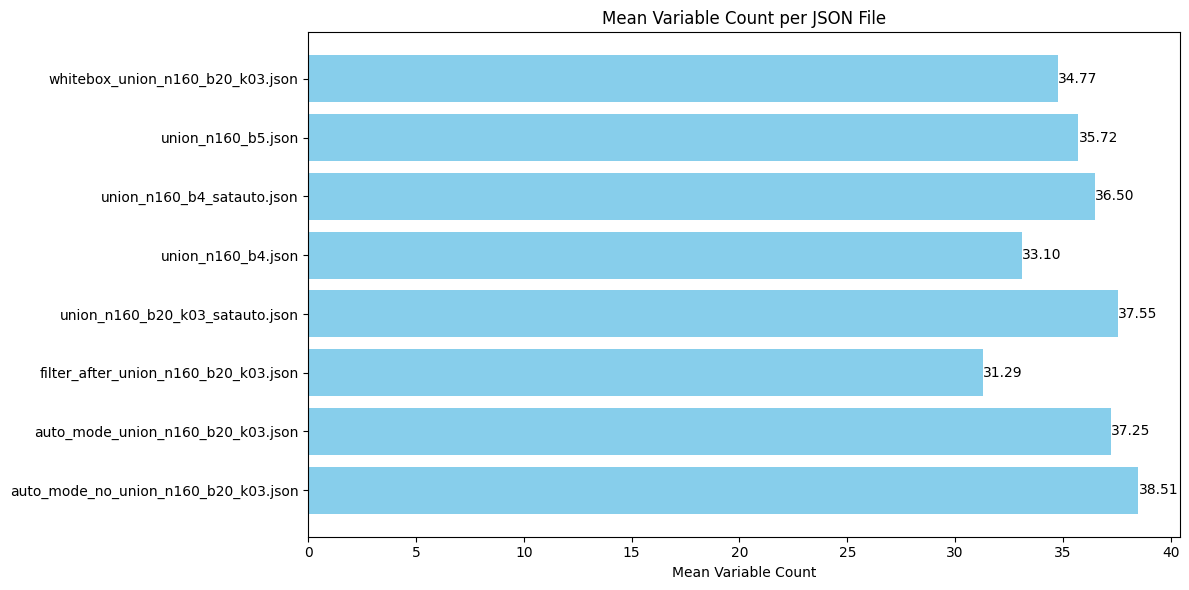

In [12]:
counts("variable_count_names_grouped_proof_found.json")

##### All

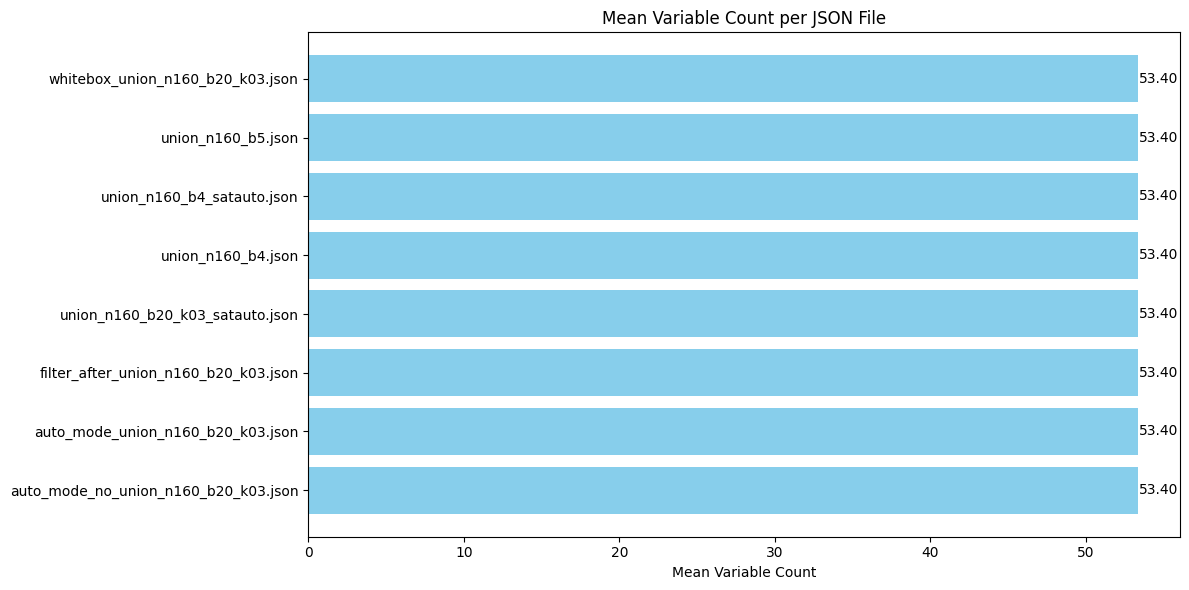

In [13]:
counts("variable_count_names_grouped_all.json")

Wie oft tritt eine Variable auf - Anzahl der Klauseln zählen in denen die Variable vorkommt  
Neue Fälle für den Union  
Warum kann man besser sein als so ein syntaktischer Solver - sind die Fälle identisch die mehr geschaffen werden? -> Fälle die sich unterscheiden sind spannend  
Zwei TimeOuts nutzen - wie viele Fälle bekommt man mit 2s oder 10s oder 100s  
Schnelligkeit messen wie lange es dauert - ist mir Union schneller?  
Man optimiert gegen den Testsatz mit WhiteBoxProofTest - kann man Axiom künstlich verlängern: alpha impliziert beta wird zu alpha impliziert beta1, beta1 impliziert beta2, beta2 impliziert beta ---> Text verlängern
Kleinerer TimeOut für erstere Studien
Semantische Nähe

Vampire als Gegenmodell zur Validität

Titel: 
- Can semantic similarities of words enhance commen sense reasoning? A case study with prover E and SUMO.
- Buzzwords: Semantic word similarity - commen sense reasoning

Hypthese: durch semantische Nähe geben wir was rein, was E so nicht wissen kann.


In [10]:
with open('../result_timer/auto_whitebox_n160_b20_k03_timer.json', 'r') as file:
    auto_no_union = json.load(file)
with open('../result_timer/auto_whitebox_union_n160_b20_k03_timer_union.json', 'r') as file:
    auto_union = json.load(file)
with open('../result_timer/whitebox_union_n160_b20_k03_satauto_timer.json', 'r') as file:
    satauto = json.load(file)

In [17]:
auto_no_union_proof = []
for i in auto_no_union:
    if auto_no_union[i][0] == "ProverResult.PROOF_FOUND":
        time = auto_no_union[i][2]
        auto_no_union_proof.append((i, time))
auto_union_proof = []
for i in auto_union:
    if auto_union[i][0] == "ProverResult.PROOF_FOUND":
        time = auto_union[i][2]
        auto_union_proof.append((i, time))
satauto_proof = []
for i in satauto:
    if satauto[i][0] == "ProverResult.PROOF_FOUND":
        time = satauto[i][2]
        satauto_proof.append((i, time))

In auto_no_union_proof but not in others

In [83]:
def find_common_entries(list1, list2):
    """
    Find entries in list1 that have paths not present in list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths not found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find unique paths in list1 that are not in list2
    unique_paths_list1 = paths_list1 - paths_list2

    # Build the list of unique entries based on the unique paths
    unique_entries = [entry for entry in list1 if entry[0] in unique_paths_list1]

    return unique_entries

In [84]:
no_union_without_union = find_common_entries(auto_no_union_proof, auto_union_proof)
no_union_without_satauto = find_common_entries(auto_no_union_proof, satauto_proof)
union_without_nounion = find_common_entries(auto_union_proof, auto_no_union_proof)
union_without_satauto = find_common_entries(auto_union_proof, satauto_proof)
satauto_without_nounion = find_common_entries(satauto_proof, auto_no_union_proof)
satauto_without_union = find_common_entries(satauto_proof, auto_union_proof)

In [92]:
print(len(no_union_without_union))
print(len(no_union_without_satauto))
print(len(union_without_nounion))
print(len(union_without_satauto))
print(len(satauto_without_nounion))
print(len(satauto_without_union))

66
60
148
4
153
15


In [42]:
print(len(auto_no_union_proof))
print(len(auto_union_proof))
print(len(satauto_proof))

309
391
402


In [52]:
time_nounion = [entry[1] for entry in auto_no_union_proof]
time_union = [entry[1] for entry in auto_union_proof]
time_satauto = [entry[1] for entry in satauto_proof]

In [53]:
print(sum(time_nounion)/len(time_nounion))
print(sum(time_union)/len(time_union))
print(sum(time_satauto)/len(time_satauto))

5.480696725999653
1.7810344238720281
2.158677997280709


time proofs found by sat and not by union

In [101]:
timelist = [a[1] for a in satauto_without_union]
print(sum(timelist)/len(timelist))

5.798877016703288


time proofs found by union and not by sat

In [100]:
timelist = [a[1] for a in union_without_satauto]
print(sum(timelist)/len(timelist))

9.43331891298294


In [111]:
def find_common_entries(list1, list2):
    """
    Find entries that have paths present in both list1 and list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths also found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find common paths between list1 and list2
    common_paths = paths_list1 & paths_list2

    # Build the list of common entries based on the common paths
    common_entries = [entry for entry in list1 if entry[0] in common_paths]

    return common_entries

In [112]:
no_union_with_union = find_common_entries(auto_no_union_proof, auto_union_proof)
no_union_with_satauto = find_common_entries(auto_no_union_proof, satauto_proof)
union_with_nounion = find_common_entries(auto_union_proof, auto_no_union_proof)
union_with_satauto = find_common_entries(auto_union_proof, satauto_proof)
satauto_with_nounion = find_common_entries(satauto_proof, auto_no_union_proof)
satauto_with_union = find_common_entries(satauto_proof, auto_union_proof)

In [124]:
def average_time(listo):
    timelist = [a[1] for a in listo]
    return sum(timelist)/len(timelist)

In [126]:
# ot takes the first one x seconds to find a proof for those in common
print(average_time(no_union_with_union))
print(average_time(no_union_with_satauto))
print(average_time(union_with_nounion))
print(average_time(union_with_satauto))
print(average_time(satauto_with_nounion))
print(average_time(satauto_with_union))

5.770150146366637
5.791593746966626
0.7194031638863646
1.7019410441396157
0.8778663236932104
2.017585012031772


Calculate how much longer it takes for one list to find proof

In [68]:
def calculate_summarized_time_diff(list1, list2):
    """
    Calculate the total time difference for entries with paths common to both lists.

    Parameters:
    list1 (list of tuples): The first list, each tuple contains a path and a value.
    list2 (list of tuples): The second list, each tuple contains a path and a value.

    Returns:
    float: The summarized time difference for common paths.
    """
    # Create a dictionary from list2 for fast lookup
    dict2 = {entry[0]: entry[1] for entry in list2}

    summarized_time_diff = 0.0

    for entry in list1:
        path, value1 = entry
        if path in dict2:
            value2 = dict2[path]
            # Calculate and accumulate time difference
            summarized_time_diff += (value1 - value2)
    
    return summarized_time_diff

In [72]:
no_union_without_union_timediff = calculate_summarized_time_diff(auto_no_union_proof, auto_union_proof)
no_union_without_satauto_timediff = calculate_summarized_time_diff(auto_no_union_proof, satauto_proof)
union_without_satauto_timediff = calculate_summarized_time_diff(auto_union_proof, satauto_proof)

In [73]:
print(no_union_without_union_timediff)
print(no_union_without_satauto_timediff)
print(union_without_satauto_timediff)

1227.3315167427063
1223.5181283950806
-122.15421557426453


RETURN 10 longest Axiomsin adimen.sumo

In [17]:
with open('axiom_counts_sumo.json', 'r') as file:
    character_count_sumo = json.load(file)

In [18]:
def top_n_highest_counts(d, n=10):
    # Sort the dictionary by values in descending order and take the top n items
    top_n = sorted(d.items(), key=lambda item: item[1], reverse=True)[:n]
    return top_n

In [19]:
top_n_highest_counts(character_count_sumo)

[('mergeA90', 6020),
 ('predefinitionsA24', 2776),
 ('predefinitionsA21', 2268),
 ('mergeA98', 1806),
 ('predefinitionsA18', 1633),
 ('miloA2283', 1197),
 ('miloA3467', 1164),
 ('mergeA1402', 1163),
 ('mergeA2724', 1141),
 ('miloA4078', 1088)]